In the following basic problems, at least 3 test cases must be written in the main
function. Space and time complexity must be evaluated. Pick problems that do not have solutions yet. Try submitting solutions on the website to test them out.

a. Pick any Easy Binary Tree problem (https://leetcode.com/tag/tree/)

b. Pick any Easy Graph problem (https://leetcode.com/tag/graph/)

In [2]:
# First problem in Binary Tree
# 100. Same Tree
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, x):
        self.val = x 
        self.left = None
        self.right = None
        
class Solution:
    def isSameTree(self, p, q):
        """
        :type p: TreeNode
        :type q: TreeNode
        :rtype: bool
        """
        if not p and not q:
            return True
            # If both tree nodes are None, then they are the same
        if p and q:
            if p.val != q.val:
                return False
                # If both tree nodes are not None, and they have different values, they are not the same 
            return self.isSameTree(p.left, q.left) and self.isSameTree(p.right, q.right)
            # If both tree nodes are not None, and they are the same, then check if their children are the same
        else:
            return False
            # If one is None, the other is not, then they are not the same 

a = TreeNode(5)
b = TreeNode(6)
c = TreeNode(5)
s = Solution()
s.isSameTree(a,c)
# s.isSameTree(a,c)
# Time/Space complexity O(1)


True

In [10]:
# Second problem in Graph
# 743. Network Delay Time 
class Solution:
    def networkDelayTime(self, times, N, K):
        """
        :type times: List[List[int]]
        :type N: int
        :type K: int
        :rtype: int
        """   
        d = [[float('inf')] * N for _ in range(N)]
        # create a N*N(N^2) list of distance: d = [[inf,...,inf],...,[inf,...,inf]] 
        for time in times:
            u, v, w = time[0] - 1, time[1] - 1, time[2]
            # nodes labelled 1 to N, but index in python is from 0 to N-1, so time[0] - 1, time[1] - 1
            d[u][v] = w
            # get the time needed from u to v listed in times
        for i in range(N):
            d[i][i] = 0
            # signal from i to i takes time 0.
        for k in range(N):
            for i in range(N):
                for j in range(N):
                    d[i][j] = min(d[i][j], d[i][k] + d[k][j])
                    # compare the time needed if signal trevals ditrctly from i to j and the time needed if travel from i to k then from k to j, take the shortest time.
        return -1 if float('inf') in d[K - 1] else max(d[K - 1])
        # if there's inf in d[K-1], then the signal from node K can't travel to ALL nodes,so return -1, if signal from K can travel to all nodes, then return the longest time.
        

s = Solution()
times = [[1,2,3],[2,3,6], [3,1,9]]
N = 3
K = 3
s.networkDelayTime(times, N, K)

# Time complexity O(n^3) 
# Space complexity O(n^2)


12

Given a binary tree in which each node represents price of an asset, which may go up (the right branch) or down (the left branch) in the next period. 

Example:

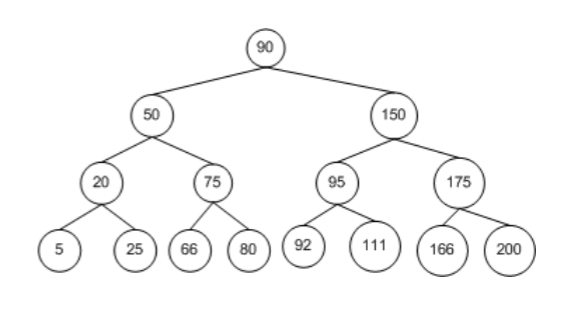

Write functions that do the following:

a. (2 points) Given a value, find a price of that value in the tree, return the node if found, None if not found.

b. (2 points) If the price is found, return all the prices from the root to the node that represents the given price. E.g: given 75, return [90, 50, 75]

c. (2 points) If the price is found, return all the prices at the nodes that are at the same height as the node that represents the given price. E.g: given 75, return [20, 75, 95, 175]

d. (2 points) If the price is found, return the depth of the node (root depth is 0)


In [3]:
#Creating nodes
class node:
    def __init__(self, value):
        self.value = value
        self.left_child = None
        self.right_child = None
        self.parent = None 
        # parent node in tree
        
class binary_search:
    def __init__(self):
        self.root = None
        
    def insert(self, value):    
    # insert method to create the tree 
        if self.root == None:
            self.root = node(value) 
            # create node if root is not created
        else:
            self._insert(value, self.root) 
            # if root node already defined, call _insert
            
    def _insert(self, value, cur_node):
        if value < cur_node.value:
        # compare the inserted number with the root node value, if newly inserted < root 
            if cur_node.left_child == None:
            # if root node has no left child
                cur_node.left_child = node(value)
                cur_node.left_child.parent = cur_node 
                # the number inserted is the left child of the root node               
            else:
            # if root node has left child
                self._insert(value, cur_node.left_child)
                # call _insert, but the cur_node will be changed to cur_node.left_child                
        elif value > cur_node.value:
        # if newly insert > root node value
            if cur_node.right_child == None:
            # if root node has no right child
                cur_node.right_child = node(value)
                cur_node.right_child.parent = cur_node
                # the number inserted is the right child of the root node
            else:
            # if root node has left child
                self._insert(value, cur_node.right_child)   
                # call _insert, but the cur_node will be changed to cur_node.right_child         
        else:
            print("Value Already Exist!")
            
    def find(self, value):
        if self.root != None:
        # if there is tree
            return self._find(value, self.root,[])
            # call _find function, make sure path = [] here, so it won't cause problem if we test multiple numbers consecutively
        else:
        # if there is no tree
            
            return None 
       
    def _find(self, value, cur_node, path=[]):
        if value == cur_node.value:
        # cur_node start from the root, later it will be renewed
            path.append(cur_node.value)
            # append the value to the path
            return path
        
        elif value > cur_node.value and cur_node.right_child != None:
        # cur_node start from the root, later it will be renewed   
            path.append(cur_node.value)
            # append the cur_node value to the path
            return self._find(value, cur_node.right_child, path) 
            # cur_node will be replaced by cur_node.right_child
        
        elif value < cur_node.value and cur_node.left_child != None:
            path.append(cur_node.value)
            return self._find(value, cur_node.left_child, path)
            # cur_node will be replaced by cur_node.left_child
        else: 
            return None
        
    def height(self,value):
        if self.root != None:
            return self._find_height(self.root, value, 0)
            # since the depth of the root node is 0, so the depth start from 0
        else:
            return None
        
    def _find_height(self, cur_node, value, cur_height):
        if value == cur_node.value:  
        # cur_node start from the root, later it will be renewed 
            return cur_height
        elif value > cur_node.value and cur_node.right_child != None:
            return self._find_height(cur_node.right_child, value, cur_height+1)
            # cur_node will be replaced by cur_node.right_child
        elif value < cur_node.value and cur_node.left_child != None:
            return self._find_height(cur_node.left_child, value, cur_height+1)
            # cur_node will be replaced by cur_node.left_child
        else:
            return None

def printKDistant(root, k): 
# this function will be used to get all the nodes at the same height
    if root is None: 
        return None
    if k == 0: 
        return a.append(root.value)
        # a is a list that will be used to store all the nodes needed
        # print(root.value)
    else: 
        printKDistant(root.left_child, k-1) 
        printKDistant(root.right_child, k-1) 

        

tree = binary_search()
l = [90,50,150,20,75,5,25,66,80,95,175,92,111,166,200]
for i in range(len(l)):
    tree.insert(l[i])
# create the tree


print('Test code using 75:')
#Q2 a and b 
print("The path of 75 is:")
print(tree.find(75))
#Q2 c
print("All the prices that are at the same height as the node 75:")
a = []
printKDistant(tree.root, tree.height(75))
print(a)





print('Enter another number you want to test:')
x = int(input())
#Q2 a and b 
print("The path of the number is:")
print(tree.find(x))
if tree.find(x) is None:
    print("The number doesn't exist.")
else:   
    #Q2 c
    print("All the prices that are at the same height as the node:")
    a = []
    printKDistant(tree.root, tree.height(x))
    print(a)
    #Q2 d 
    print("The depth of the node is", tree.height(x))
    
# insert function: time complexity: O(logn) space complexity: O(logn) 
# find function: time complexity: O(logn) space complexity: O(logn) 
# height function: time complexity: O(logn) space complexity: O(logn) 


Test code using 75:
The path of 75 is:
[90, 50, 75]
All the prices that are at the same height as the node 75:
[20, 75, 95, 175]
Enter another number you want to test:
1
The path of the number is:
None
The number doesn't exist.
